In [21]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import minmax_scale
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split

In [26]:
df = pd.read_csv(os.path.join(os.path.abspath('..'), '../lab2/reduce_data.csv'), 
index_col=None).iloc[:,1:6].set_axis(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'labels'], axis=1, inplace=False)
features = df.loc[:,'feature_1':'feature_4'].to_numpy('float')
labels = df['labels'].to_numpy('int')

/tmp/ipykernel_1855/3898058686.py:1: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df = pd.read_csv(os.path.join(os.path.abspath('..'), '../lab2/reduce_data.csv'),


In [29]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=12)

In [30]:
classifier = tree.DecisionTreeClassifier()

y_predict = classifier.fit(X_train, y_train).predict(X_test)
print((y_test != y_predict).sum())

12


In [31]:
from sklearn.metrics import accuracy_score


accuracy_score(y_predict, y_test)

0.7209302325581395

In [35]:
print(classifier.get_depth())
print(classifier.get_n_leaves())

10
44


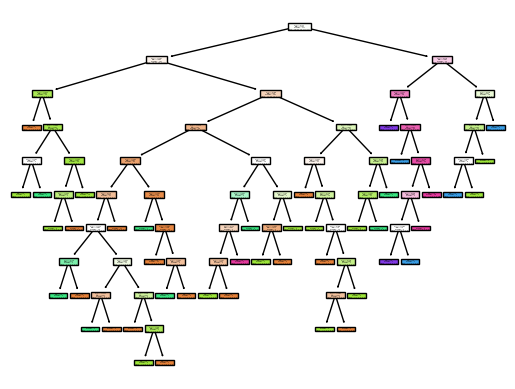

In [40]:
tree.plot_tree(classifier, filled = True)
plt.show()

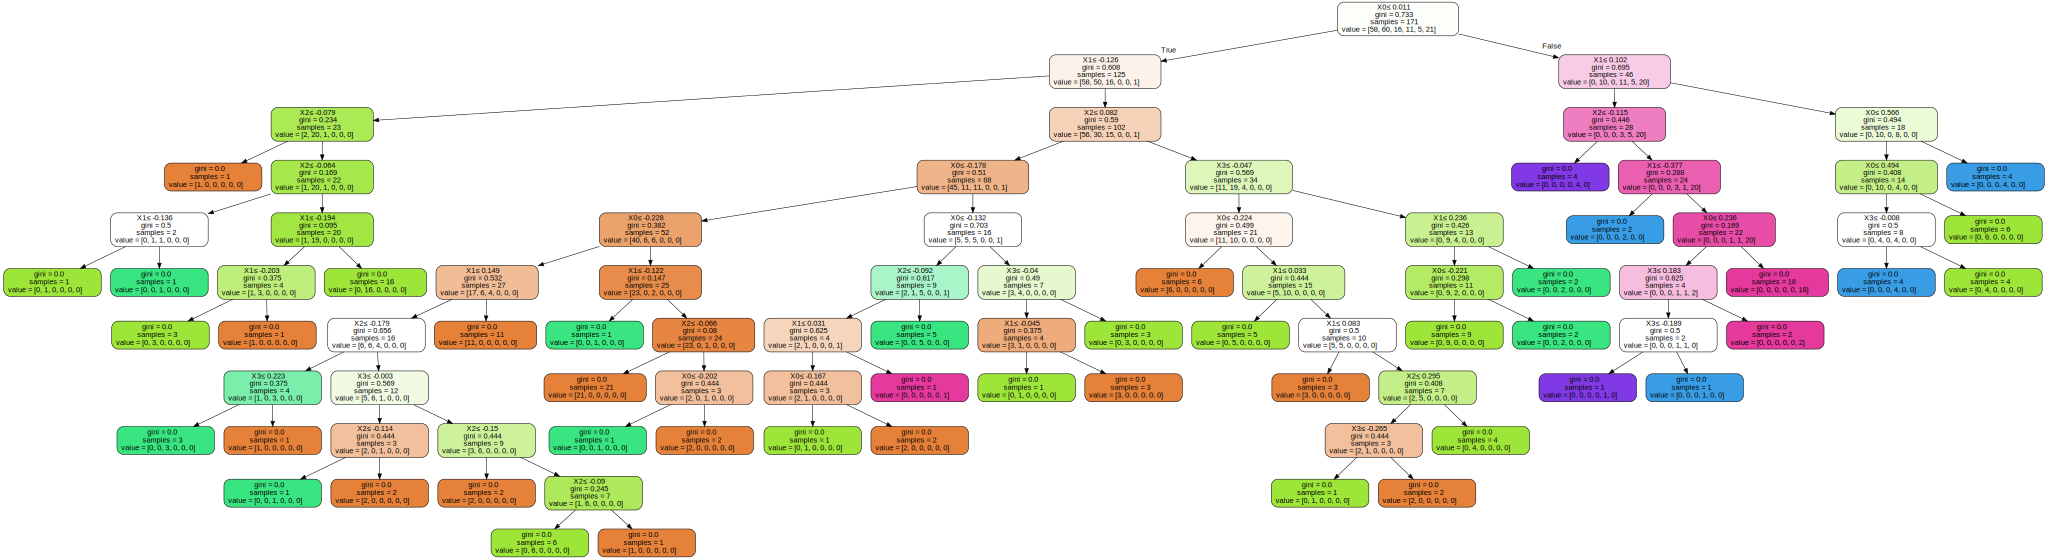

In [42]:
import graphviz


dot_data = tree.export_graphviz(classifier, 
                                out_file=None,  
                                filled=True, 
                                rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 